In [1]:
!pip install spotipy --upgrade
!pip install requests

In [84]:
import requests
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from sklearn.metrics.pairwise import cosine_similarity
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spotify_data = pd.read_csv("tracks.csv")

## Get Spotify Listening History

In [26]:

# Set your Spotify API credentials as environment variables, it will pick by spotipy API
os.environ["SPOTIPY_CLIENT_ID"] = "27213f126d46480d93cfd26483a2c2cf"
os.environ["SPOTIPY_CLIENT_SECRET"] = "616ad4f9592443a1a587ca79ab53bead"
os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost:8881/callback"

# Just this scope good enough to get user_recently_played API
scope = "user-read-recently-played"

# This API call raise web browser and ask user login for getting callback with Authorization Code flow
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

# After get token, can call real API
recently_played = sp.current_user_recently_played(limit=50)
recently_played

{'items': [{'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1McMsnEElThX1knmY4oliG'},
       'href': 'https://api.spotify.com/v1/artists/1McMsnEElThX1knmY4oliG',
       'id': '1McMsnEElThX1knmY4oliG',
       'name': 'Olivia Rodrigo',
       'type': 'artist',
       'uri': 'spotify:artist:1McMsnEElThX1knmY4oliG'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',
      'EC',
      'EE',
      'SV',
      'FI',
      'FR',
      'GR',
      'GT',
      'HN',
      'HK',
      'HU',
      'IS',
      'IE',
      'IT',
      'LV',
      'LT',
      'LU',
      'MY',
      'MT',
      'MX',
      'NL',
      'NZ',
      'NI',
      'NO',
      'PA',
      'PY',
      'PE',
      'PH',
      'PL',
      'PT',
      'SG',
      'SK',
      'ES',
      'SE',


In [7]:
recently_played_song = {}
for item in recently_played['items']:
    track_name = item['track']['name']
    track_id = item['track']['id']
    recently_played_song[track_name] = sp.audio_features(tracks=track_id)

In [43]:
recently_played_song

{'logical': [{'danceability': 0.499,
   'energy': 0.246,
   'key': 7,
   'loudness': -8.082,
   'mode': 1,
   'speechiness': 0.0345,
   'acousticness': 0.853,
   'instrumentalness': 0,
   'liveness': 0.1,
   'valence': 0.153,
   'tempo': 81.051,
   'type': 'audio_features',
   'id': '53dtP2iUMvaF28JZcHnFuU',
   'uri': 'spotify:track:53dtP2iUMvaF28JZcHnFuU',
   'track_href': 'https://api.spotify.com/v1/tracks/53dtP2iUMvaF28JZcHnFuU',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/53dtP2iUMvaF28JZcHnFuU',
   'duration_ms': 231907,
   'time_signature': 4}],
 'drivers license': [{'danceability': 0.561,
   'energy': 0.431,
   'key': 10,
   'loudness': -8.81,
   'mode': 1,
   'speechiness': 0.0578,
   'acousticness': 0.768,
   'instrumentalness': 1.42e-05,
   'liveness': 0.106,
   'valence': 0.137,
   'tempo': 143.875,
   'type': 'audio_features',
   'id': '5wANPM4fQCJwkGd4rN57mH',
   'uri': 'spotify:track:5wANPM4fQCJwkGd4rN57mH',
   'track_href': 'https://api.spotify.com/v1/t

In [9]:
song_data = {}

for song_name, song_info in recently_played_song.items():
    song_data[song_name] = {}
    for attribute, value in song_info[0].items():
            song_data[song_name][attribute] = value

df = pd.DataFrame(song_data).T
df = df.iloc[:,:11]
df = df.drop(["mode"],axis=1)

In [90]:
df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_title,,,,,,,,,,
logical,0.499,0.246,7,-8.082,0.0345,0.853,0,0.1,0.153,81.051
drivers license,0.561,0.431,10,-8.81,0.0578,0.768,0.000014,0.106,0.137,143.875
bad idea right?,0.627,0.879,9,-3.446,0.0955,0.00193,0.000007,0.0647,0.748,129.979
good 4 u,0.563,0.664,9,-5.044,0.154,0.335,0,0.0849,0.688,166.928
vampire,0.511,0.532,5,-5.745,0.0578,0.177,0,0.291,0.35,138.005
Buzzcut Season,0.733,0.62,1,-10.525,0.075,0.606,0.305,0.117,0.247,111.039
Mood Ring,0.683,0.478,5,-10.435,0.0744,0.422,0.000012,0.24,0.373,95.011
Magnets,0.704,0.628,10,-7.882,0.162,0.0626,0.000001,0.103,0.654,92.005
Green Light,0.594,0.721,2,-7.812,0.0957,0.0209,0.000009,0.0879,0.253,128.942


<Figure size 1000x500 with 0 Axes>

## Get Spotify Songs

In [10]:
spotify_data = spotify_data.drop(["id","explicit","popularity","duration_ms","artists","id_artists","release_date","time_signature"],axis=1)

In [11]:
spotify_data = spotify_data.set_index(spotify_data.columns[0])

In [12]:
spotify_data.drop(["mode"],axis=1)
df.index.name = "song_title"
spotify_data.index.name = "song_title"

In [14]:
spotify_data = spotify_data.drop("mode",axis=1)

In [15]:
spotify_data

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_title,,,,,,,,,,
Carve,0.645,0.4450,0,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851
Capítulo 2.16 - Banquero Anarquista,0.695,0.2630,0,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009
Vivo para Quererte - Remasterizado,0.434,0.1770,1,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418
El Prisionero - Remasterizado,0.321,0.0946,7,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980
Lady of the Evening,0.402,0.1580,3,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...
云与海,0.560,0.5180,0,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896
blind,0.765,0.6630,0,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091
What They'll Say About Us,0.535,0.3140,7,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095


## Normalize data

In [16]:
df_norm = (df - df.min())/(df.max()-df.min())
spotify_data = (spotify_data - spotify_data.min()) / (spotify_data.max()-spotify_data.min())

In [17]:
features = ['danceability', 'energy', 'key', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo']

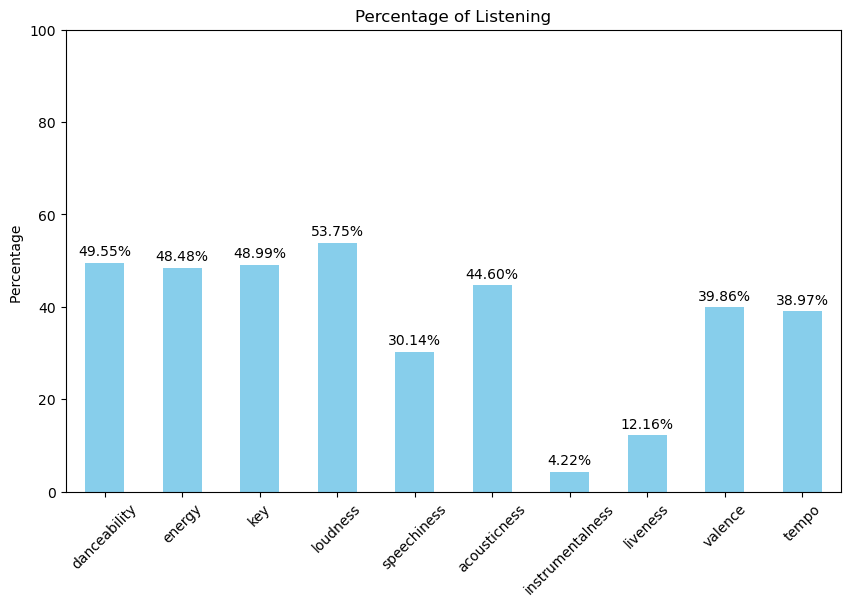

In [96]:
percentage_listeing = df_norm.sum()/df_norm.count()*100
plt.figure(figsize=(10, 6))
bars = percentage_listeing.plot(kind='bar',color="skyblue")
plt.title('Percentage of Listening')
plt.ylabel('Percentage ')
plt.ylim(0, 100) 
plt.xticks(rotation=45) 

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom')
plt.show()

## Use Cosine Similarity 

In [19]:
similarity_matrix = cosine_similarity(df_norm[features], spotify_data[features])

In [30]:
similarity_matrix

array([[0.64922534, 0.63455619, 0.82459107, ..., 0.92657323, 0.76237399,
        0.61434396],
       [0.6813582 , 0.6629598 , 0.79828195, ..., 0.96189969, 0.84375029,
        0.70700545],
       [0.63564523, 0.68003346, 0.60586449, ..., 0.7054876 , 0.92264655,
        0.94910413],
       ...,
       [0.59547261, 0.7424855 , 0.83116445, ..., 0.64366917, 0.50426662,
        0.60013115],
       [0.54833623, 0.55022834, 0.78331071, ..., 0.87777662, 0.66995318,
        0.57241311],
       [0.72709675, 0.65799397, 0.89062754, ..., 0.93677824, 0.71318191,
        0.61790823]])

In [80]:
top_indices = similarity_matrix.argmax(axis=1) #index of maximun value

In [98]:
recommendations = spotify_data.iloc[top_indices]

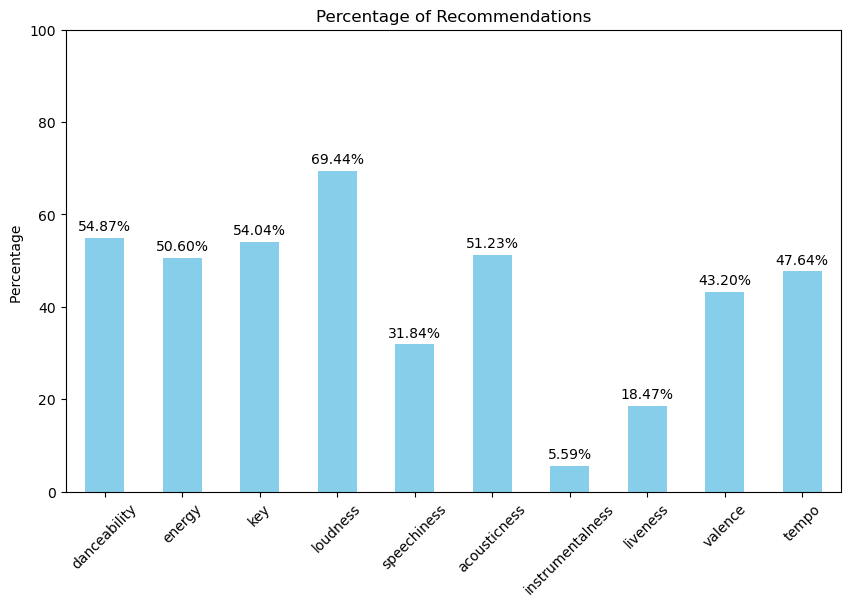

In [97]:
percentage_recommendations = recommendations.sum()/recommendations.count()*100
plt.figure(figsize=(10, 6))
bars = percentage_recommendations.plot(kind='bar',color="skyblue")
plt.title('Percentage of Recommendations')
plt.ylabel('Percentage ')
plt.ylim(0, 100) 
plt.xticks(rotation=45) 

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom')
plt.show()